In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
##SUBIR BASE DE DATOS Y CONECTAR
tuber_df = pd.read_csv("/content/Tuberculosis_Dataset.csv", encoding='latin-1')
# Limpiar los nombres de las columnas eliminando espacios iniciales y finales, y caracteres innecesarios
tuber_df.columns = tuber_df.columns.str.strip().str.replace(';', '').str.replace(' ', '_').str.lower()


In [ ]:
# Mostrar las primeras filas del conjunto de datos
print("Vista previa del conjunto de datos:")
print(tuber_df.head())

Vista previa del conjunto de datos:
         país   año  tasa_de_incidencia_de_tuberculosis  población  \
0  Country_52  2003                           56.145286     788566   
1  Country_15  2021                          137.470346    1282706   
2  Country_61  2014                          179.814220    1100374   
3  Country_21  2014                          124.211205    1141641   
4  Country_24  2011                           50.394259     759040   

   prevalencia_de_vih  tasa_de_éxito_del_tratamiento  tasa_de_mortalidad  \
0           15.124856                      63.008939           18.417301   
1            1.365238                      63.861596           25.804928   
2           13.770958                      92.017009           15.319141   
3            8.198825                      94.747900            9.405584   
4            4.472235                      83.710431           37.830973   

   porcentaje_de_población_urbana  tasa_de_tabaquismo  consumo_de_alcohol  \
0        

In [ ]:
# --- 1: Comprender la estructura del conjunto de datos ---

# Información general sobre el conjunto de datos
print("Información del conjunto de datos:")
tuber_df.info()

Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51189 entries, 0 to 51188
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   país                                      51189 non-null  object 
 1   año                                       51189 non-null  int64  
 2   tasa_de_incidencia_de_tuberculosis        51189 non-null  float64
 3   población                                 51189 non-null  int64  
 4   prevalencia_de_vih                        51189 non-null  float64
 5   tasa_de_éxito_del_tratamiento             51189 non-null  float64
 6   tasa_de_mortalidad                        51189 non-null  float64
 7   porcentaje_de_población_urbana            51189 non-null  float64
 8   tasa_de_tabaquismo                        51189 non-null  float64
 9   consumo_de_alcohol                        51189 non-null  float64
 10 

In [ ]:
#show 5 datos aleatorios
print("Cinco datos aleatorios:")
print(tuber_df.sample(5))

Cinco datos aleatorios:
             país   año  tasa_de_incidencia_de_tuberculosis  población  \
28661   Country_4  2011                          137.292779    1721930   
11456  Country_29  2008                          126.276664     978824   
21913  Country_70  2004                          186.291802    1317685   
25245  Country_40  2007                            0.000000     647163   
21088  Country_28  2009                          152.304213     434326   

       prevalencia_de_vih  tasa_de_éxito_del_tratamiento  tasa_de_mortalidad  \
28661            7.030471                      74.371831           20.710421   
11456           14.181002                      95.559040           25.118268   
21913            9.502574                      83.757138           27.382758   
25245           10.714340                      95.555105            9.140589   
21088           11.673684                      84.186469           18.044714   

       porcentaje_de_población_urbana  tasa_de_tab

In [ ]:
# Estadísticas de resumen para variables numéricas
print("Estadísticas de resumen:")
print(tuber_df.describe())

Estadísticas de resumen:
                año  tasa_de_incidencia_de_tuberculosis     población  \
count  51189.000000                        51189.000000  5.118900e+04   
mean    2010.987556                          149.939840  1.007268e+06   
std        6.642278                           50.273734  4.887370e+05   
min     2000.000000                            0.000000  1.000000e+04   
25%     2005.000000                          115.896988  6.689840e+05   
50%     2011.000000                          150.002077  1.003910e+06   
75%     2017.000000                          183.628591  1.339742e+06   
max     2022.000000                          383.098928  3.052740e+06   

       prevalencia_de_vih  tasa_de_éxito_del_tratamiento  tasa_de_mortalidad  \
count        51189.000000                   51189.000000        51189.000000   
mean             9.968683                      79.943963           20.049540   
std              5.782515                      11.561828            9.802202 

In [ ]:
# Verificar valores faltantes
print("Valores faltantes:")
val_faltantes = tuber_df.isnull().sum()
print(val_faltantes[val_faltantes > 0]) # Mostrar solo columnas con valores faltantes

Valores faltantes:
grupo_de_edad                               1
género                                      1
tasa_de_coinfección_por_vih                 1
cobertura_de_vacunación_con_bcg             1
tasa_de_resistencia_a_múltiples_fármacos    1
tasa_de_desempleo                           1
pib_per_cápita                              1
esperanza_de_vida                           1
cobertura_de_detección_de_tuberculosis      1
porcentaje_de_población_rural               1
dtype: int64


In [ ]:
# Verificar filas duplicadas
filas_duplicadas = tuber_df.duplicated().sum()
print(f"\nNumero de filas duplicadas: {filas_duplicadas}")


Numero de filas duplicadas: 0


In [ ]:
#Conocer el nombre de las columnas de mi dataframe
column_names = tuber_df.columns.values
print(column_names)

['país' 'año' 'tasa_de_incidencia_de_tuberculosis' 'población'
 'prevalencia_de_vih' 'tasa_de_éxito_del_tratamiento' 'tasa_de_mortalidad'
 'porcentaje_de_población_urbana' 'tasa_de_tabaquismo'
 'consumo_de_alcohol' 'gasto_sanitario_per_cápita'
 'acceso_a_atención_sanitaria_primaria' 'grupo_de_edad' 'género'
 'tasa_de_coinfección_por_vih' 'cobertura_de_vacunación_con_bcg'
 'tasa_de_resistencia_a_múltiples_fármacos' 'tasa_de_desempleo'
 'pib_per_cápita' 'esperanza_de_vida'
 'cobertura_de_detección_de_tuberculosis' 'porcentaje_de_población_rural']


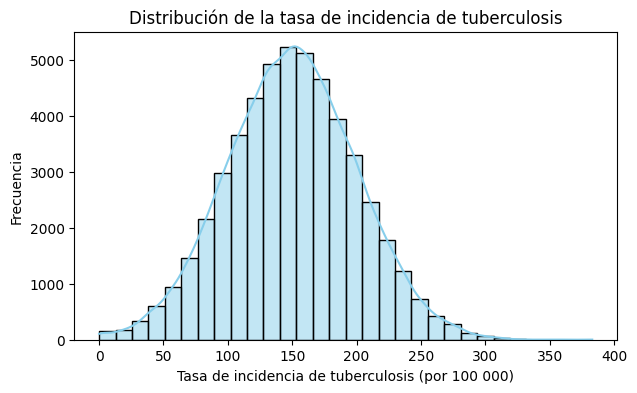

In [ ]:
# --- 2: Análisis univariado ---

# Distribución de la tasa de incidencia de tuberculosis
plt.figure(figsize=(7, 4))
sns.histplot(tuber_df['tasa_de_incidencia_de_tuberculosis'], kde=True, bins=30, color="skyblue")
plt.title("Distribución de la tasa de incidencia de tuberculosis")
plt.xlabel("Tasa de incidencia de tuberculosis (por 100 000)")
plt.ylabel("Frecuencia")
plt.show()

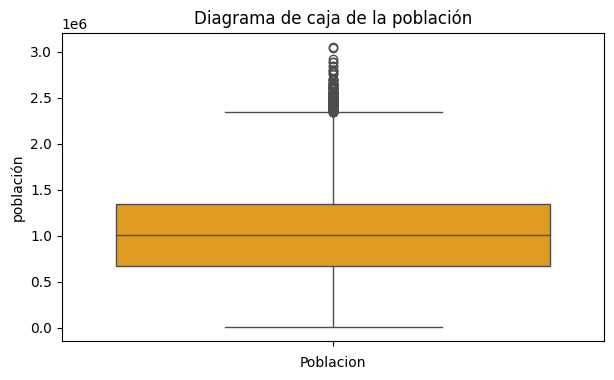

In [ ]:
# Distribución de la población
plt.figure(figsize=(7, 4))
sns.boxplot(tuber_df['población'], color="orange")
plt.title("Diagrama de caja de la población")
plt.xlabel("Poblacion")
plt.show()

In [ ]:
# Ver los nombres de las columnas
print(tuber_df.columns)

Index(['país', 'año', 'tasa_de_incidencia_de_tuberculosis', 'población',
       'prevalencia_de_vih', 'tasa_de_éxito_del_tratamiento',
       'tasa_de_mortalidad', 'porcentaje_de_población_urbana',
       'tasa_de_tabaquismo', 'consumo_de_alcohol',
       'gasto_sanitario_per_cápita', 'acceso_a_atención_sanitaria_primaria',
       'grupo_de_edad', 'género', 'tasa_de_coinfección_por_vih',
       'cobertura_de_vacunación_con_bcg',
       'tasa_de_resistencia_a_múltiples_fármacos', 'tasa_de_desempleo',
       'pib_per_cápita', 'esperanza_de_vida',
       'cobertura_de_detección_de_tuberculosis',
       'porcentaje_de_población_rural'],
      dtype='object')


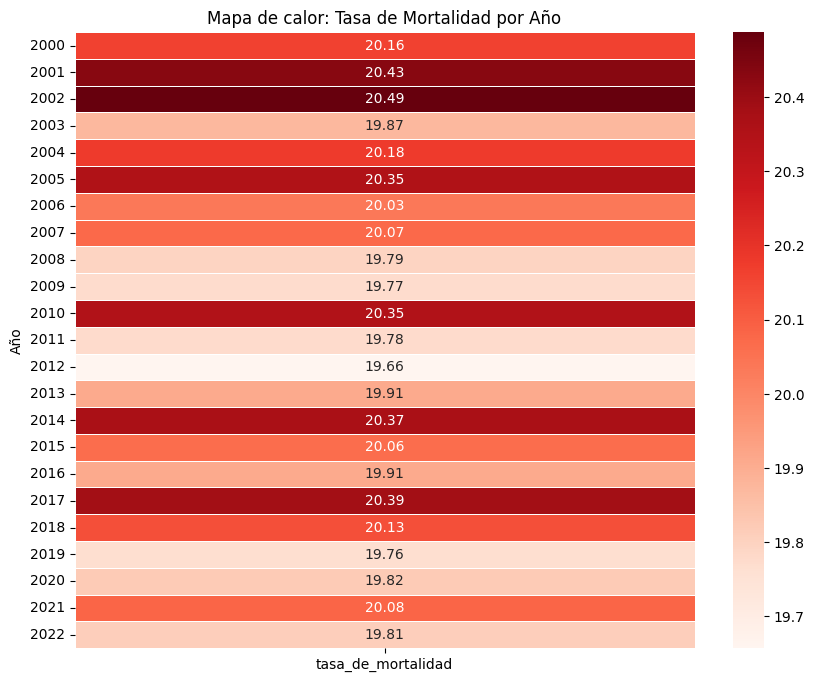

In [ ]:
#DIAGRAMA DE CALOR
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ESTANDARIZAR NOMBRES DE COLUMNAS
tuber_df.columns = tuber_df.columns.str.strip().str.lower().str.replace(" ", "_")

# SELECCIONAR LAS COLUMNAS RELEVANTES
columnas_relevantes = ["año", "tasa_de_mortalidad"]
df_mortalidad = tuber_df[columnas_relevantes].copy()

# Redondear valores
df_mortalidad = df_mortalidad.round(2)

# ORGANIZAR POR ANO
df_mortalidad = df_mortalidad.sort_values(by="año")

# FORMATEAR TABLA
df_pivot = df_mortalidad.pivot_table(index="año", values="tasa_de_mortalidad")

# CREAR DIAGRAMA DE CALOR
plt.figure(figsize=(10, 8))
sns.heatmap(df_pivot, annot=True, cmap="Reds", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor: Tasa de Mortalidad por Año")
plt.ylabel("Año")
plt.show()

<ipython-input-14-dd04d92ee401>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='género', data=tuber_df, palette="pastel")


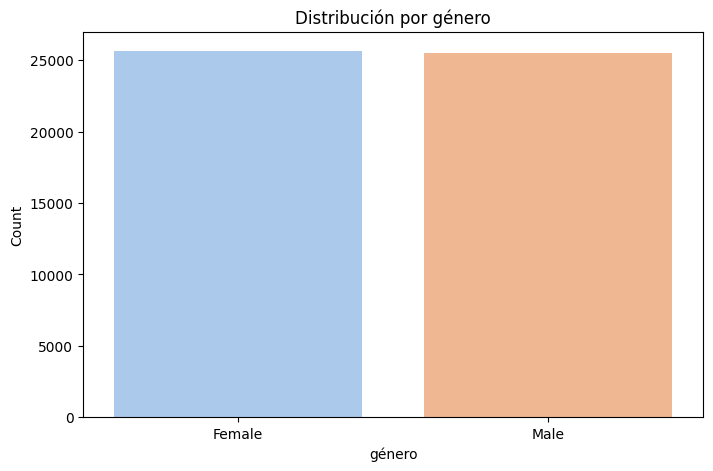

In [ ]:
# Distribución de variables categóricas: género
plt.figure(figsize=(8, 5))
sns.countplot(x='género', data=tuber_df, palette="pastel")
plt.title("Distribución por género")
plt.xlabel("género")
plt.ylabel("Count")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Definir variable objetivo (y) y predictoras (X)
target = 'tasa_de_incidencia_de_tuberculosis'
X = tuber_df.drop(columns=[target])
y = tuber_df[target]

# Dividir los datos en conjuntos de entrenamiento y prueba (70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar las dimensiones de los conjuntos resultantes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((35832, 21), (15357, 21), (35832,), (15357,))

In [ ]:
from sklearn.preprocessing import StandardScaler

# Aplicar estandarización a las características numéricas
scaler = StandardScaler()
X_train_scaled, X_test_scaled = None, None

try:
    # Ajustar el escalador en el conjunto de entrenamiento y transformarlo
    X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))

    # Transformar el conjunto de prueba
    X_test_scaled = scaler.transform(X_test.select_dtypes(include=['float64', 'int64']))
except NameError:
    pass

X_train_scaled, X_test_scaled

(array([[ 0.60366241,  0.93501092, -1.72215815, ...,  1.39485431,
          1.65179274,  0.80240138],
        [-1.50444936, -0.3162825 ,  1.20527712, ..., -1.47269324,
          0.84617957, -1.20399925],
        [ 1.65771829, -0.43943168, -0.3291082 , ..., -1.1711871 ,
         -1.59777319, -0.9018804 ],
        ...,
        [-0.45039348, -0.43804536, -1.20642562, ..., -0.60917295,
         -1.21410887,  0.13798131],
        [ 1.20598006,  1.20049252,  0.25614026, ..., -1.62508252,
          1.50245743, -0.48516274],
        [ 0.453083  , -1.48956923, -0.03790059, ...,  0.72016126,
         -0.36597302,  1.57654006]]),
 array([[ 0.30250358, -1.82675457,  1.2898449 , ...,  0.97043066,
          1.65227684,  0.74844261],
        [-1.35386995,  0.0521903 ,  0.68091816, ..., -0.29337383,
          0.69256876,  0.32893981],
        [ 1.05540065, -1.03478204,  1.33554647, ...,  0.37571028,
         -0.22547656, -0.75290836],
        ...,
        [-1.50444936,  0.20583855,  0.39609169, ...,  

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

y_train = pd.Series(y_train)
y_test = pd.Series(y_test)
# Crear imputer para reemplazar NaN con mean
imputer = SimpleImputer(strategy='mean')

# Convertir a categorías (baja, media, alta)
X_train_num = X_train.select_dtypes(include=['float64', 'int64'])
X_test_num = X_test.select_dtypes(include=['float64', 'int64'])

X_train_imputed = imputer.fit_transform(X_train_num)
X_test_imputed = imputer.transform(X_test_num)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Inicializar el modelo LogisticRegression
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_class)
y_test_encoded = le.transform(y_test_class)

# Reentrenar con las clases
model.fit(X_train_scaled, y_train_encoded)
y_pred_encoded = model.predict(X_test_scaled)

y_pred_class = le.inverse_transform(y_pred_encoded)

# Evaluar el modelo de clasificación
print("Accuracy:", accuracy_score(y_test_class, y_pred_class))
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_class))


Accuracy: 0.3258448915803868

Classification Report:
               precision    recall  f1-score   support

        alta       0.33      0.32      0.32      5119
        baja       0.33      0.34      0.33      5119
       media       0.32      0.32      0.32      5119

    accuracy                           0.33     15357
   macro avg       0.33      0.33      0.33     15357
weighted avg       0.33      0.33      0.33     15357



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear y entrenar un modelo de regresión (Random Forest)
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = regressor.predict(X_test_scaled)

# Evaluar el modelo
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 2553.6384964572117
R² Score: -0.0190338766381426


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn import set_config

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#metrics
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

In [ ]:
le = LabelEncoder()
tuber_df['tasa_de_incidencia_de_tuberculosis'] = le.fit_transform(tuber_df['tasa_de_incidencia_de_tuberculosis'])

In [ ]:
# Llamando nombre de las clases
le.classes_

array([0.00000000e+00, 1.36181724e-02, 7.78961254e-02, ...,
       3.80955885e+02, 3.82745316e+02, 3.83098928e+02])

In [ ]:
le.transform(le.classes_)

array([    0,     1,     2, ..., 51124, 51125, 51126])

In [ ]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_mapping

{0.0: 0,
 0.0136181723925119: 1,
 0.0778961253770376: 2,
 0.3568281628988643: 3,
 0.4017449530190049: 4,
 0.7110363889518112: 5,
 0.7201481693902849: 6,
 0.7832715562990415: 7,
 0.8960358181185768: 8,
 1.0470965468811642: 9,
 1.3173822726367064: 10,
 1.6311182351034574: 11,
 1.737439432894007: 12,
 1.7539699829613653: 13,
 1.9620614159439071: 14,
 2.307760800240601: 15,
 2.377017892285892: 16,
 2.5983382397127457: 17,
 2.6951453702036474: 18,
 2.753093986091528: 19,
 2.7958766493669884: 20,
 2.8844724522589047: 21,
 3.008007890871454: 22,
 3.0929792339966866: 23,
 3.158884860330744: 24,
 3.3124593084653213: 25,
 3.427575648338518: 26,
 3.5115517354837493: 27,
 3.523915662338112: 28,
 3.723856486348353: 29,
 3.7747367477002456: 30,
 3.8144431679734234: 31,
 3.8355718540331054: 32,
 3.88144003127232: 33,
 4.026465740089748: 34,
 4.10996223451167: 35,
 4.602878090407216: 36,
 4.669713311755373: 37,
 4.710331170867022: 38,
 4.752432804799724: 39,
 4.772334658809854: 40,
 4.902287336381846:

In [ ]:
#show 5 datos aleatorios
print("Cinco datos aleatorios:")
print(tuber_df.sample(5))

Cinco datos aleatorios:
             país   año  tasa_de_incidencia_de_tuberculosis  población  \
21623  Country_30  2017                               19485    1336174   
24585  Country_42  2008                               24321    1238769   
23930   Country_2  2020                                4395     642495   
42434  Country_50  2022                               22561    1563720   
46284   Country_7  2017                               34858     923934   

       prevalencia_de_vih  tasa_de_éxito_del_tratamiento  tasa_de_mortalidad  \
21623            2.848053                      61.811994           34.250840   
24585            5.966871                      65.635602           20.799540   
23930           16.538426                      62.316781           22.446305   
42434           15.618217                      78.796120           31.671229   
46284            0.961409                      71.971213           29.378331   

       porcentaje_de_población_urbana  tasa_de_tab

In [ ]:
#DIVISION DATOS DE ENTRENAMIENTO Y TEST
X = tuber_df.drop(['tasa_de_incidencia_de_tuberculosis'], axis=1)
y = tuber_df['tasa_de_incidencia_de_tuberculosis']

In [ ]:
#DIVIDIR LOS DATOS EN CONJUNTOS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pandas as pd

# Selecionar las columnas deseadas
tuber_df_selected = tuber_df[['país', 'año', 'tasa_de_incidencia_de_tuberculosis', 'tasa_de_éxito_del_tratamiento']]
#MOSTRAR 5 DATOS DE LAS COLUMNAS SELECCIONADAS
tuber_df_selected.head()

,país,año,tasa_de_incidencia_de_tuberculosis,tasa_de_éxito_del_tratamiento
0,Country_52,2003,1543,63.008939
1,Country_15,2021,20520,63.861596
2,Country_61,2014,37068,92.017009
3,Country_21,2014,15462,94.747900
4,Country_24,2011,1172,83.710431


In [ ]:
# #DIVIDIR LOS DATOS EN CONJUNTOS
X = tuber_df_selected['país']
y = tuber_df_selected['tasa_de_incidencia_de_tuberculosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convertir la variable objetivo en categórica usando pd.cut
# Define los bins y etiquetas según tus necesidades
y_train = pd.cut(y_train, bins=[-float("inf"), 50, 100, float("inf")], labels=['baja', 'media', 'alta'])
y_test = pd.cut(y_test, bins=[-float("inf"), 50, 100, float("inf")], labels=['baja', 'media', 'alta'])

##CONVERTIR TEXTO EN UNA MATRIZ DE CARACTERISTICAS
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
#CREAR Y ENTRENAR EL MODELO NAIVES BAYES
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
#HACER PREDICCIONES EN EL CONJUNTO DE PRUEBA
y_pred = model.predict(X_test_vec)

In [ ]:
#EVALUAR EL MODELO y mostrar Matrix de Confusion
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Exactitud:", accuracy_score(y_test, y_pred))
print("Reporte de clasificacion:\n", classification_report(y_test, y_pred))


Exactitud: 0.9967441557595884
Reporte de clasificacion:
               precision    recall  f1-score   support

        alta       1.00      1.00      1.00     15307
        baja       0.00      0.00      0.00        37
       media       0.00      0.00      0.00        13

    accuracy                           1.00     15357
   macro avg       0.33      0.33      0.33     15357
weighted avg       0.99      1.00      1.00     15357



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#LLAMAR COLUMNAS PAIS, AÑO, POBLACION Y TASA DE MORTALIDAD
selected_features = ['país', 'año', 'población', 'tasa_de_mortalidad']

# Create a new DataFrame with selected columns
filtered_df = tuber_df[selected_features]

# Display the first 15 rows of the filtered DataFrame
filtered_df.head(15)

,país,año,población,tasa_de_mortalidad
0,Country_52,2003,788566,18.417301
1,Country_15,2021,1282706,25.804928
2,Country_61,2014,1100374,15.319141
3,Country_21,2014,1141641,9.405584
4,Country_24,2011,759040,37.830973
5,Country_3,2004,1127537,15.469065
6,Country_22,2021,730640,21.144555
7,Country_53,2009,416485,31.705406
8,Country_2,2009,671118,32.487016
9,Country_30,2018,1447182,30.321615


In [ ]:
temp_df = pd.concat([filtered_df.loc[X_train.index].reset_index(drop=True),
                     y_train.reset_index(drop=True)], axis='columns')
temp_df = temp_df.drop_duplicates()

X_train = temp_df.drop(columns=['tasa_de_incidencia_de_tuberculosis'])
y_train = temp_df['tasa_de_incidencia_de_tuberculosis']

In [ ]:
#PIPILINE PROCESAMIENTO
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score


numerical_features = ['año', 'población', 'tasa_de_mortalidad']
categorical_features = ['país']

preprocessor = ColumnTransformer(
    transformers=[
        ('Numerico', StandardScaler(), numerical_features),
        ('Categoria', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ])

pipeline_data = Pipeline([
    ('preprocessor', preprocessor),
    ('Componentes', PCA(n_components=3)),
])

In [ ]:
#MODELO
model_rf = RandomForestClassifier()

In [ ]:
#PIPELINE TRANSFORMACION Y MODELO
pipeline_transform_model = Pipeline([
    ('pipeline_data', pipeline_data),
    ('model_rf', model_rf),
])

In [ ]:
set_config(display='diagram')
pipeline_transform_model

Pipeline(steps=[('pipeline_data',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(transformers=[('Numerico',
                                                                   StandardScaler(),
                                                                   ['año',
                                                                    'población',
                                                                    'tasa_de_mortalidad']),
                                                                  ('Categoria',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['país'])])),
                                 ('Componentes', PCA(n_components=3))])),
                ('model_rf', RandomForestClassifier())])

In [ ]:
#Cross validation
scoring = 'accuracy'
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=30)

cv_results = cross_val_score(pipeline_transform_model, X_train, y_train, cv=kfold, scoring=scoring)

print("Cross-validation scores:", cv_results)
print("Average score:", cv_results.mean())


Cross-validation scores: [0.99681849 0.99687413]
Average score: 0.9968463070475504


In [ ]:
#HIPERPARAMETRIZACION
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'model_rf__n_estimators': [10, 20, 30],
    'model_rf__max_depth': [2, 3, 4, None],
    'model_rf__max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(pipeline_transform_model, param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=30, shuffle=True),
             estimator=Pipeline(steps=[('pipeline_data',
                                        Pipeline(steps=[('preprocessor',
                                                         ColumnTransformer(transformers=[('Numerico',
                                                                                          StandardScaler(),
                                                                                          ['año',
                                                                                           'población',
                                                                                           'tasa_de_mortalidad']),
                                                                                         ('Categoria',
                                                                                          OneHotEncoder(handle_unknown='ignore'),
                                                                                          ['país'])])),
                                                        ('Componentes',
                                                         PCA(n_components=3))])),
                                       ('model_rf', RandomForestClassifier())]),
             param_grid={'model_rf__max_depth': [2, 3, 4, None],
                         'model_rf__max_features': ['sqrt', 'log2', None],
                         'model_rf__n_estimators': [10, 20, 30]},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'model_rf__max_depth': 2,
 'model_rf__max_features': 'sqrt',
 'model_rf__n_estimators': 10}

In [ ]:
print(f"Mejor resultado = {grid_search.best_score_}")
#desviacion
print(f"Desviacion estandar = {grid_search.cv_results_['std_test_score'][grid_search.best_index_]}")

Mejor resultado = 0.9968463070475504
Desviacion estandar = 2.7820778293885517e-05


In [ ]:
#EVALUACION DE LOS MEJORES HIPERPARAMETROS CONTRA TEST
best_model = grid_search.best_estimator_
X_test_selected = tuber_df.loc[X_test.index, ['país','año', 'población', 'tasa_de_mortalidad']]
X_test_prepared = best_model['pipeline_data'].transform(X_test_selected)

from sklearn.metrics import accuracy_score
print(f"Accuracy = {accuracy_score(y_test, y_pred)}")

Accuracy = 0.9967441557595884


In [ ]:
#MODELO FINAL
modelo_final = pipeline_transform_model.set_params(**grid_search.best_params_)
modelo_final.fit(X_train, y_train)
accuracy_train = accuracy_score(y_train, modelo_final.predict(X_train))
print(f"PRECISION = {accuracy_train}")

PRECISION = 0.996846306271106


In [ ]:
#ALMACENAR MODELO FINAL
from joblib import dump
dump(pipeline_transform_model, 'pipeline_transform_model.joblib')

['pipeline_transform_model.joblib']

In [ ]:
#CARGAR MODELO FINAL Y HACER PREDICCIONES
from joblib import load
pipeline_transform_model = load('pipeline_transform_model.joblib')

In [ ]:
##CALCULAR NIVEL DE PRECISION
from joblib import load
loaded_model = load('pipeline_transform_model.joblib')
# Create a DataFrame for prediction
input_data = pd.DataFrame([['Country_52', 2003, 788566, 18.4173005890854]],
                         columns=['país', 'año', 'población', 'tasa_de_mortalidad'])
pred_unico = loaded_model.predict(input_data)
print(pred_unico)

['alta']
